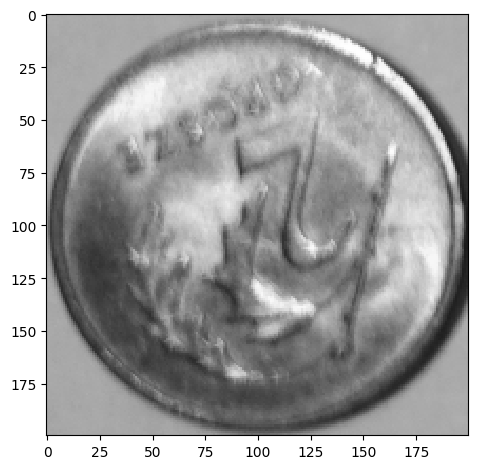

In [15]:
import skimage.io
from skimage.color import rgba2rgb, rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

from aoc.utils import extract_coin

# Load and prepare the image
image = skimage.io.imread("data/20241117_213835.jpg")


resize_shape = (200, 200)
bounding_box = (330, 940, 970, 1590)

image = extract_coin(image, bounding_box, resize_shape)

skimage.io.imshow(image)
plt.show()

Text(0.5, 1.0, 'FFT')

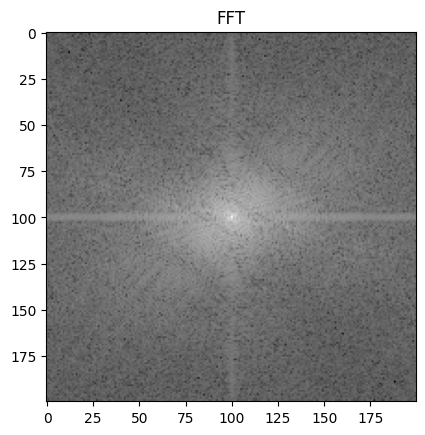

In [16]:
fft_image = np.fft.fftshift(np.fft.fft2(image))
plt.imshow(np.log(abs(fft_image)), cmap="gray")
plt.title("FFT")

Text(0.5, 1.0, 'Mask')

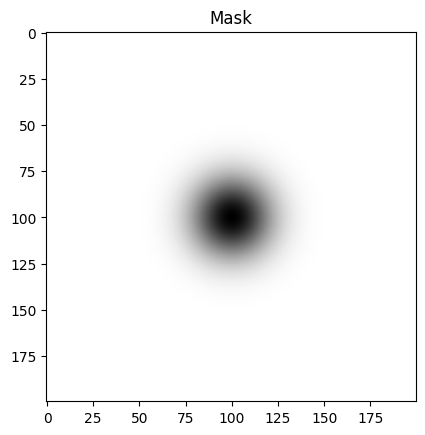

In [17]:
from aoc.utils import gaussuian_mask

mask_sigma = 15

mask = gaussuian_mask(resize_shape, mask_sigma)

plt.imshow(mask, cmap="gray")
plt.title("Mask")

Text(0.5, 1.0, 'High-pass FFT filtered')

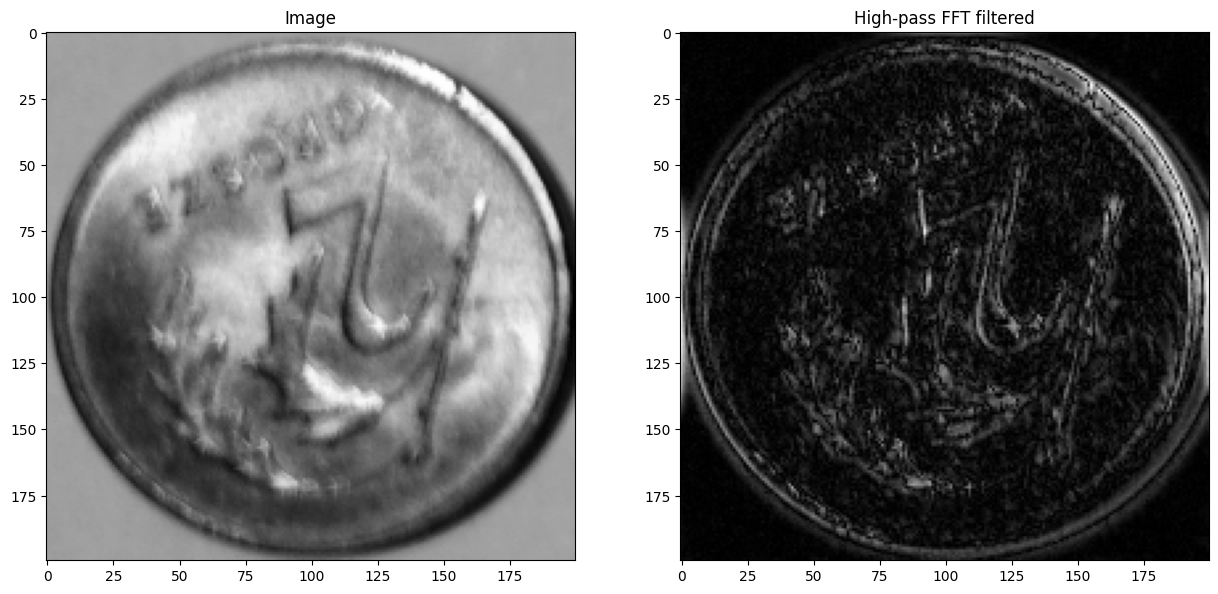

In [18]:
from aoc.utils import convolve_mask

filtered = convolve_mask(image, mask)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))


ax[0].imshow(image, cmap="gray")
ax[0].set_title("Image")
ax[1].imshow(filtered, cmap="gray")
ax[1].set_title("High-pass FFT filtered")